<a href="https://colab.research.google.com/github/Xiaocong233/ReinforcementLearning_ML/blob/master/RL_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning Tutorial in Python**
###### Created by **Xiaocong Yan** for [StartOnAI](https://startonai.com/)
---


## 1. Introduction to RL

![alt text](https://lilianweng.github.io/lil-log/assets/images/RL_illustration.png)

- What is Reinforcement Learning?
  - RL is a subfield in machine learning, it particularly focuses on training AI agents to behave in a certain way by learning directly from its surrounding environment
  - Essentially, we are training the agent to choose the optimal action (`a`) given a state (`s`) from the environment that will maxmimizes an engineered reward (`r`)

- RL Applications
  - gameplaying AI
    - AlphaGo

    <img src="https://cdn.geekwire.com/wp-content/uploads/2016/03/160312-go-630x353.jpg" alt="alt text" width="500" height="300">

    - AlphaStar

    <img src="https://www.version2.dk/sites/v2/files/topillustration/2019/01/alphastarscreenshot.png" alt="alt text" width="600" height="337">
  
  - agent in simulation learning to walk
  
  <img src="https://nav74neet.github.io/media/blog/walking.png" alt="alt text"  width='600' height='250'>

  - robots learning to walk

    <img src="https://www.researchgate.net/profile/Pieter_Jonker/publication/236015074/figure/fig1/AS:299857928572950@1448503109999/a-LEO-a-2D-walking-robot-suitable-for-on-line-Reinforcement-Learning-8-b-Simplest.png" alt="alt text"  width='340' height='255'>

## 2. Explore-exploit dilemma and Multi-Armed Bandit Problem

- A fundamental intuition of RL lies within the balancing of explore and exploit
- Example: casino multi-armed bandits (slot machines)
  ![alt text](https://miro.medium.com/max/1250/1*7axVBpiVF4VQCxxP1UNcnw.png)
    - suppose we have three bandits with their own unique probablities of winning the jackpot
      - in this case, the agent is learning from the environment "casino" containing all the bandits by repeatedly taking action and playing, along the way figuring out which bandit is the best to play
      - at start, the agent has no ideas what the probabilities are
      - the agent then "explores" by playing to find the bandit with the highest winning rate as quickly as possible such that it can then "exploit" it by playing solely on it

### 2A. Greedy Algorithm
  - drawing upon an updating sample proportion `p_hat` of each bandit (current number of wins / times played on the bandit), a basic greedy algorithm, as its name suggests, will only choose the bandit with the highest current sample proportion
  - problem: `p_hat` may be drastically different than the real probability, especially in the beginning where we don't have many samples or times played yet
    - in fact, if we draw two bandits and one return a win and the other a loss, updating `p_hat` will result in 1 for the victorious bandit and 0 for the losing bandit.
      - we will never again choose the losing bandit ever again using greedy algorithm since no matter how many times we update the probability for the victorious bandit, it will never reach below 0
      - practically, we will be missing out on exploring the losing bandit at all and choose to solely exploit the winning bandit, when, in reality, the unlucky losing bandit may have a much higher real winning probability

### 2B. Epsilon Greedy Algorithm
  - solution to the greedy problem: adding a chance in each draw, parameterized by variable `epsilon`, where we will choose randomly from all the existing bandits, regardless of their sample proportions
  - thus it is created a fundamental algorithm behind RL

optimal bandit: 4
bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.194 | true win_rate: 0.25
bandit3 estimate win-rate: 0.521 | true win_rate: 0.5
bandit4 estimate win-rate: 0.75 | true win_rate: 0.75

total reward: 7119.0
overall win-rate: 0.7119
explore count: 997
exploit count: 9003
optimal selection rate: 0.923
num times selected each bandit: [243.0, 247.0, 280.0, 9230.0]


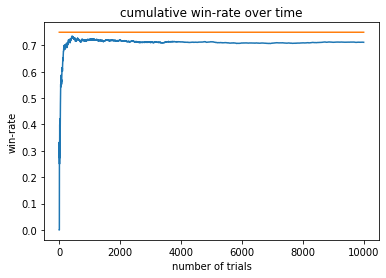

optimal bandit: 4
bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.243 | true win_rate: 0.25
bandit3 estimate win-rate: 0.483 | true win_rate: 0.5
bandit4 estimate win-rate: 0.75 | true win_rate: 0.75

total reward: 71203.0
overall win-rate: 0.71203
explore count: 9914
exploit count: 90086
optimal selection rate: 0.92541
num times selected each bandit: [2513.0, 2426.0, 2520.0, 92541.0]


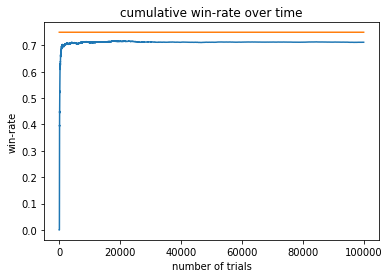

In [34]:
# importing essential libraries for graphing and array processing
import matplotlib.pyplot as plt
import numpy as np

# creating the blueprint for a bandit slot machine
class Bandit:
  def __init__(self, p):
    self.p = p # the winning rate
    self.p_hat = 0. # sample proportion, or the estimation for the winning rate, intialized to 0
    self.n = 0. # number of samples collected on this bandit

  def pull(self):
    # draw the virtual bandit with a random probability p and check if won according to the winning rate
    # return 1 if won, 0 if lost
    return np.random.random() < self.p

  def update(self, x):
    # increment numbers of samples collected
    self.n += 1.
    # calculate the new p hat from the previous p hat and the newly obtained value (0 or 1)
    self.p_hat = ((self.n - 1) * self.p_hat + x) / self.n

def run_simulation(bandits_probs_list, epsilon, N):
  # bandits_probs_list: a list containing the win-rates of bandits that we want to create
  # epsilon: probability of random selection
  # n: numbers of trials, times we pull from bandits

  # create a list of bandit objects according to their probabilities of win rate
  bandits = [Bandit(p) for p in bandits_probs_list]
  
  # initialize variables
  rewards = np.zeros(N)
  times_explored = 0
  times_exploited = 0
  times_optimal_chosen = 0

  # selecting the optimal bandit based the highest true probability
  optimal_bandit = np.argmax([bandit.p for bandit in bandits])
  # print out the true optimal bandit number
  print('optimal bandit:', optimal_bandit + 1) # +1 because optimal_bandit is 0 indexed

  # use epsilon_greedy to select the next bandit
  for i in range(N):
    # if probability drawn is smaller than epsilon, randomly select a bandit
    if np.random.random() < epsilon:
      times_explored += 1
      bandit = np.random.randint(len(bandits))
    # else selecting the bandit with the highest p_hat
    else:
      times_exploited += 1
      bandit = np.argmax([bandit.p_hat for bandit in bandits])
                         
    # check if the bandit chosen is actually the optimal bandit
    if bandit == optimal_bandit:
      # update the correct action count
      times_optimal_chosen += 1

    # pull the arm for the bandit selected
    x = bandits[bandit].pull()

    # update rewards logs and sample proportion estimates accordingly
    rewards[i] = x
    bandits[bandit].update(x)     
  
  # print proportion estimates for each bandit
  for i, bandit in enumerate(bandits):
    print(f'bandit{i + 1} estimate win-rate: {round(bandit.p_hat, 3)} | true win_rate: {bandit.p}')

  # print total reward
  print()
  print('total reward:', rewards.sum())
  print('overall win-rate:', rewards.sum() / N)
  print('explore count:', times_explored)
  print('exploit count:', times_exploited)
  print('optimal selection rate:', times_optimal_chosen / N)
  print("num times selected each bandit:", [bandit.n for bandit in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(N) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(N) * np.max(bandits_probs_list))
  plt.title('cumulative win-rate over time')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

if __name__ == '__main__':
  # simulate two multi-armed bandit problem with 4 machines with win-rates 0, 0.25, 0.5, 0.75
  # Epsilon default to 0.1, thus 10% of random selection chance
  # N defaulted to 10000 trials for first simulation, 100000 for the second
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 10000)
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 100000)

  - problem: the chance of selecting a random bandit is fixed throughout all trials
    - as time progresses and we collect more and more samples, we should be more confident about the sample proportion estimating the real proportion, therefore we should spend more time exploiting rather than exploring.
  - solution 1: decaying epsilon
    - we can decrease the `epsilon` throughout the trials by setting it inversely proportional to trials `n` or time, parametrized by a separate variable `t` (`epsilon / t`).
      - both would function the same way in which we would do random selection less and less as we collect more samples.
  - solution 2: probability distribution algorithms
    - Upper Confidence Bound (UCB)
    - Thompson Sampling



### 2C. Upper Confidence Bound (UCB) Algorithm
**I. Background**

- during the explanation of the problem in Epsilon Greedy, the word "confidence" was referred in the intuitive sense
  - in fact, this confidence can be modeled mathetically as the "confidence interval", in this case the probabilistic deviation of the true proportion around our sample mean which equals to
  ![alt text](https://mat117.wisconsin.edu/wp-content/uploads/2014/12/section8-7.png)
    - p_hat = sample mean
    - z = how many standard deviations away on a normal distribution
    - n = numbers of samples taken

    ![alt text](https://qph.fs.quoracdn.net/main-qimg-fb825a5584d571ed78ef869a50793a83.webp)
  
  - as we take more samples, we see the curve that models the probability distribution tightens

    ![alt text](https://demonstrations.wolfram.com/DistributionOfNormalMeansWithDifferentSampleSizes/img/popup_3.png)
    - mathematically, since n is in the denominator, as it increases, our overall confidence interval size decreases
    - there can also be seen a larger under the curve covering around the sample mean (or proportion)
      - now, at the same confidence level, we will have a smaller confidence interval knowing the true proportion is closer to our sample proportion

**II. UCB Intuition**
 ![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20200126022459/Screenshot-2020-01-26-at-2.24.37-AM.png)
 - UCB's confidence interval for each bandit, similar to a traditional confidence interval, is modeled by the addition of a sample mean estimate and an error: Xⱼ +- error
  - Xⱼ = sample mean of choosing bandit j
  - error = `sqrt(c * ln(N)/nⱼ)`, c is a constant parameter controlling the size of the bound, `N` is number of trails taken, `nⱼ` is the number of times bandit j has been selected
    - intuitively, the error term will gradually decrease with more samples collected on one bandit as `nⱼ` increases in the denominator, representing the agent becoming more confident of the sample proportion estimate
    - however, as trial number increases and a bandit has not been selected very often such that `nⱼ` is low relative to trials `N`, the error will become high, since in UCB the agent will opt for the bandit with the highest upperbound, it is more likely for the bandit with a high error to be selected to explore
      - interestingly, since `N` is inside of a log function, it gradually becomes less weighted compared `nⱼ`, the error term thus will gradually shrink down to zero with more we explore each bandit

**III. Code**
    


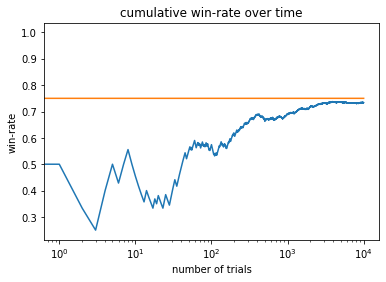

bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.25 | true win_rate: 0.25
bandit3 estimate win-rate: 0.514 | true win_rate: 0.5
bandit4 estimate win-rate: 0.744 | true win_rate: 0.75
total reward earned: 7336.0
overall win rate: 0.7336
num times selected each bandit: [30.0, 64.0, 247.0, 9663.0]


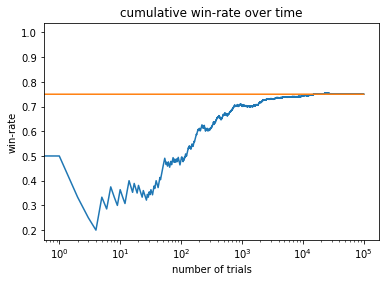

bandit1 estimate win-rate: 0.0 | true win_rate: 0
bandit2 estimate win-rate: 0.179 | true win_rate: 0.25
bandit3 estimate win-rate: 0.48 | true win_rate: 0.5
bandit4 estimate win-rate: 0.752 | true win_rate: 0.75
total reward earned: 75022.0
overall win rate: 0.75022
num times selected each bandit: [40.0, 67.0, 281.0, 99616.0]


In [35]:
# importing essential libraries for graphing and array processing
import numpy as np
import matplotlib.pyplot as plt

# creating the blueprint for a bandit slot machine
class Bandit:
  def __init__(self, p):
    self.p = p # the winning rate
    self.p_hat = 0. # sample proportion, or the estimation for the winning rate, intialized to 0
    self.n = 0. # number of samples collected on this bandit

  def pull(self):
    # draw the virtual bandit with a random probability p and check if won according to the winning rate
    # return 1 if won, 0 if lost
    return np.random.random() < self.p

  def update(self, x):
    # increment numbers of samples collected
    self.n += 1.
    # calculate the new p hat from the previous p hat and the newly obtained value (0 or 1)
    self.p_hat = ((self.n - 1) * self.p_hat + x) / self.n

def ucb(X, N, n):
  # return the upper bound of bandit
    # X: sample proportion estimate of this bandit's win-rate
    # N: total numbers of trials so far
    # n: total numbers of time this bandit has been selected
  return X + np.sqrt(2 * np.log(N) / n)


def run_simulation(bandits_probs_list, epsilon, trials):
  # bandits_probs_list: a list 
  # epsilon: probability of random selection
  # trials: numbers of trials, times we pull from bandits

  # create a list of bandit objects according to their probabilities of win rate
  bandits = [Bandit(p) for p in bandits_probs_list]
  
  # initialize variables
  rewards = np.zeros(trials)
  N = 0

  # beginning by playing each bandit once to avoid 0/0
  for bandit in bandits:
    x = bandit.pull()
    bandit.update(x)
    N += 1
  
  # repeat for "trials" times
  for i in range(trials):
    # get the index of the bandit with the highest upper confidence bound
    bandit_index = np.argmax([ucb(bandit.p_hat, N, bandit.n) for bandit in bandits])

    # pull the bandit and update the sample proportion according to its reward, increment trials taken
    x = bandits[bandit_index].pull()
    bandits[bandit_index].update(x)
    N += 1

    # logging the reward for trial i
    rewards[i] = x

   # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(trials) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(trials) * np.max(bandits_probs_list))
  plt.xscale('log')
  plt.title('cumulative win-rate over time')
  plt.xlabel('number of trials')
  plt.ylabel('win-rate')
  plt.show()

  # print proportion estimates for each bandit
  for i, bandit in enumerate(bandits):
    print(f'bandit{i + 1} estimate win-rate: {round(bandit.p_hat, 3)} | true win_rate: {bandit.p}')

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / trials)
  print("num times selected each bandit:", [bandit.n for bandit in bandits])

if __name__ == '__main__':
  # simulate two multi-armed bandit problem with 4 machines with win-rates 0, 0.25, 0.5, 0.75
  # Epsilon default to 0.1, thus 10% of random selection chance
  # N defaulted to 10000 trials for first simulation, 100000 for the second
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 10000)
  run_simulation([0, 0.25, 0.5, 0.75], 0.1, 100000)

**IV. Reflection**
- Compared to Epsilon Greedy, we see the agent's overall win-rate on UCB approaches the probability of winning on the optimal bandit, representing that the agent consolidates its selection choice down to the optimal bandit as it becomes more confident of its sample proportion estimate. There is also more times exploiting the optimal machine
  - Thus UCB is definitely superior when performing higher numbers of trials

## 3. Markov Decision Processes
- to be continued

## 4. Monte Carlo Algorithm
- to be continued

## 5. Q-Learning
- to be continued

## Sources:
- to be added